# PERKENALAN

NAMA : MUHAMMAD HANIF SUYUTHI

PROGRAM : FTDS

BATCH : RMT-019

# DEFAULT RISK - HOME DEPOT

# DESKRIPSI

## OBJEKTIF
MELAKUKAN EDA PADA DATASET


In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1=pd.read_csv("/content/drive/MyDrive/Hacktiv8/Final Project/application_train.csv")
df2=pd.read_csv("/content/drive/MyDrive/Hacktiv8/Final Project/application_test.csv")

In [4]:
df1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df6=pd.read_csv("/content/drive/MyDrive/Hacktiv8/Final Project/HomeCredit_columns_description.csv",encoding='latin-1')

In [6]:
df6

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [7]:
df_desc=df6[df6['Table']=='application_{train|test}.csv']

In [8]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# EDA

In [14]:
cat_cols=df1.select_dtypes(include='object').columns.tolist()
num_cols=df1.select_dtypes(include=['int','float']).columns.tolist()

In [10]:
df1 = df1[df1['CODE_GENDER']!='XNA']

df1['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [11]:
df1 = df1[df1['AMT_INCOME_TOTAL'] != 117000000.0]
df1['AMT_INCOME_TOTAL'].describe()

count    3.075060e+05
mean     1.684178e+05
std      1.088124e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [12]:
df1['DAYS_EMPLOYED'] = df1['DAYS_EMPLOYED'].apply(lambda x: np.nan if x==365243 else x)
df2['DAYS_EMPLOYED'] = df2['DAYS_EMPLOYED'].apply(lambda x: np.nan if x==365243 else x)

In [26]:
df1[num_cols]=df1[num_cols].abs()

In [27]:
df_eda = df1.copy()

In [15]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [60]:
data = {
    'fitur': df_eda[cat_cols].columns,
    'nuniq': df_eda[cat_cols].nunique(),
    'uniq': df_eda[cat_cols].apply(lambda x: x.unique())
}
eda_cat_uniq = pd.DataFrame(data)

eda_cat_uniq

,fitur,nuniq,uniq
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,2,"[Cash loans, Revolving loans]"
CODE_GENDER,CODE_GENDER,2,"[M, F]"
FLAG_OWN_CAR,FLAG_OWN_CAR,2,"[N, Y]"
FLAG_OWN_REALTY,FLAG_OWN_REALTY,2,"[Y, N]"
NAME_TYPE_SUITE,NAME_TYPE_SUITE,7,"[Unaccompanied, Family, Spouse, partner, Child..."
NAME_INCOME_TYPE,NAME_INCOME_TYPE,8,"[Working, State servant, Commercial associate,..."
NAME_EDUCATION_TYPE,NAME_EDUCATION_TYPE,5,"[Secondary / secondary special, Higher educati..."
NAME_FAMILY_STATUS,NAME_FAMILY_STATUS,6,"[Single / not married, Married, Civil marriage..."
NAME_HOUSING_TYPE,NAME_HOUSING_TYPE,6,"[House / apartment, Rented apartment, With par..."
OCCUPATION_TYPE,OCCUPATION_TYPE,18,"[Laborers, Core staff, Accountants, Managers, ..."


Dari tabel terlihat bahwa terdapat kolom numerik yang merupakan kategorik (meiliki sedikit nunique)

In [32]:
df_eda['default_status']=df1['TARGET'].apply(lambda x: 'Not Repaying' if x == 1 else 'Repaying')

Kita akan melihat persebaran data

<Axes: xlabel='default_status', ylabel='count'>

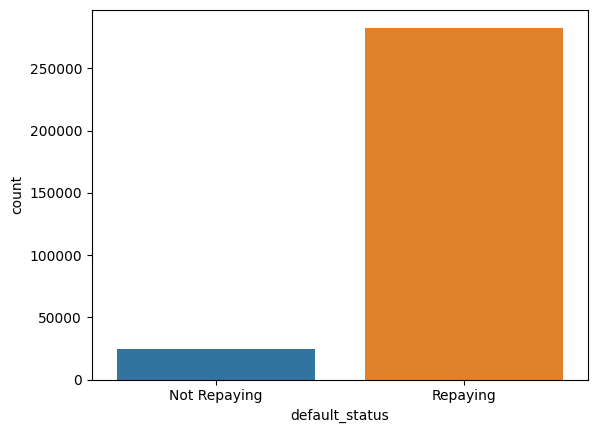

In [33]:
sns.countplot(data = df_eda ,x = 'default_status')

In [ ]:
df_eda['default_status']

In [53]:
value_counts = df_eda['default_status'].value_counts()
total_count = value_counts.sum()
df_default_status = pd.DataFrame({'Value': value_counts.index,
                                  'Count': value_counts.values,
                                  'Percentage': value_counts.values / total_count * 100})

print(df_default_status)

          Value   Count  Percentage
0      Repaying  282682   91.927312
1  Not Repaying   24824    8.072688


## Kolom Kategorik

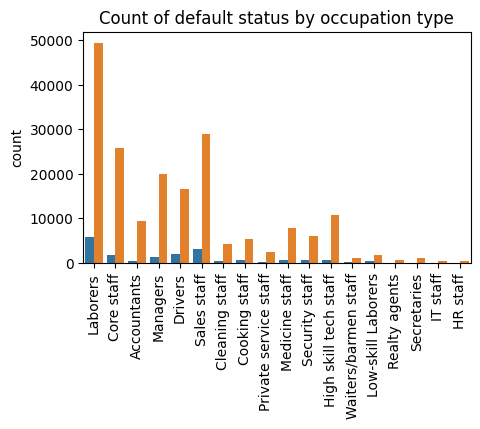

In [34]:
fig, ax = plt.subplots(figsize=(5, 3))  # Create a figure and axis object

sns.countplot(data=df_eda, x='OCCUPATION_TYPE', hue='default_status', ax=ax)
ax.tick_params(axis='x', rotation=90)
ax.legend_.remove()
ax.set_xlabel('')
ax.set_title('Count of default status by occupation type')

plt.show()  # Display the plot


In [35]:
df_eda["default_status"]

0         Not Repaying
1             Repaying
2             Repaying
3             Repaying
4             Repaying
              ...     
307506        Repaying
307507        Repaying
307508        Repaying
307509    Not Repaying
307510        Repaying
Name: default_status, Length: 307506, dtype: object

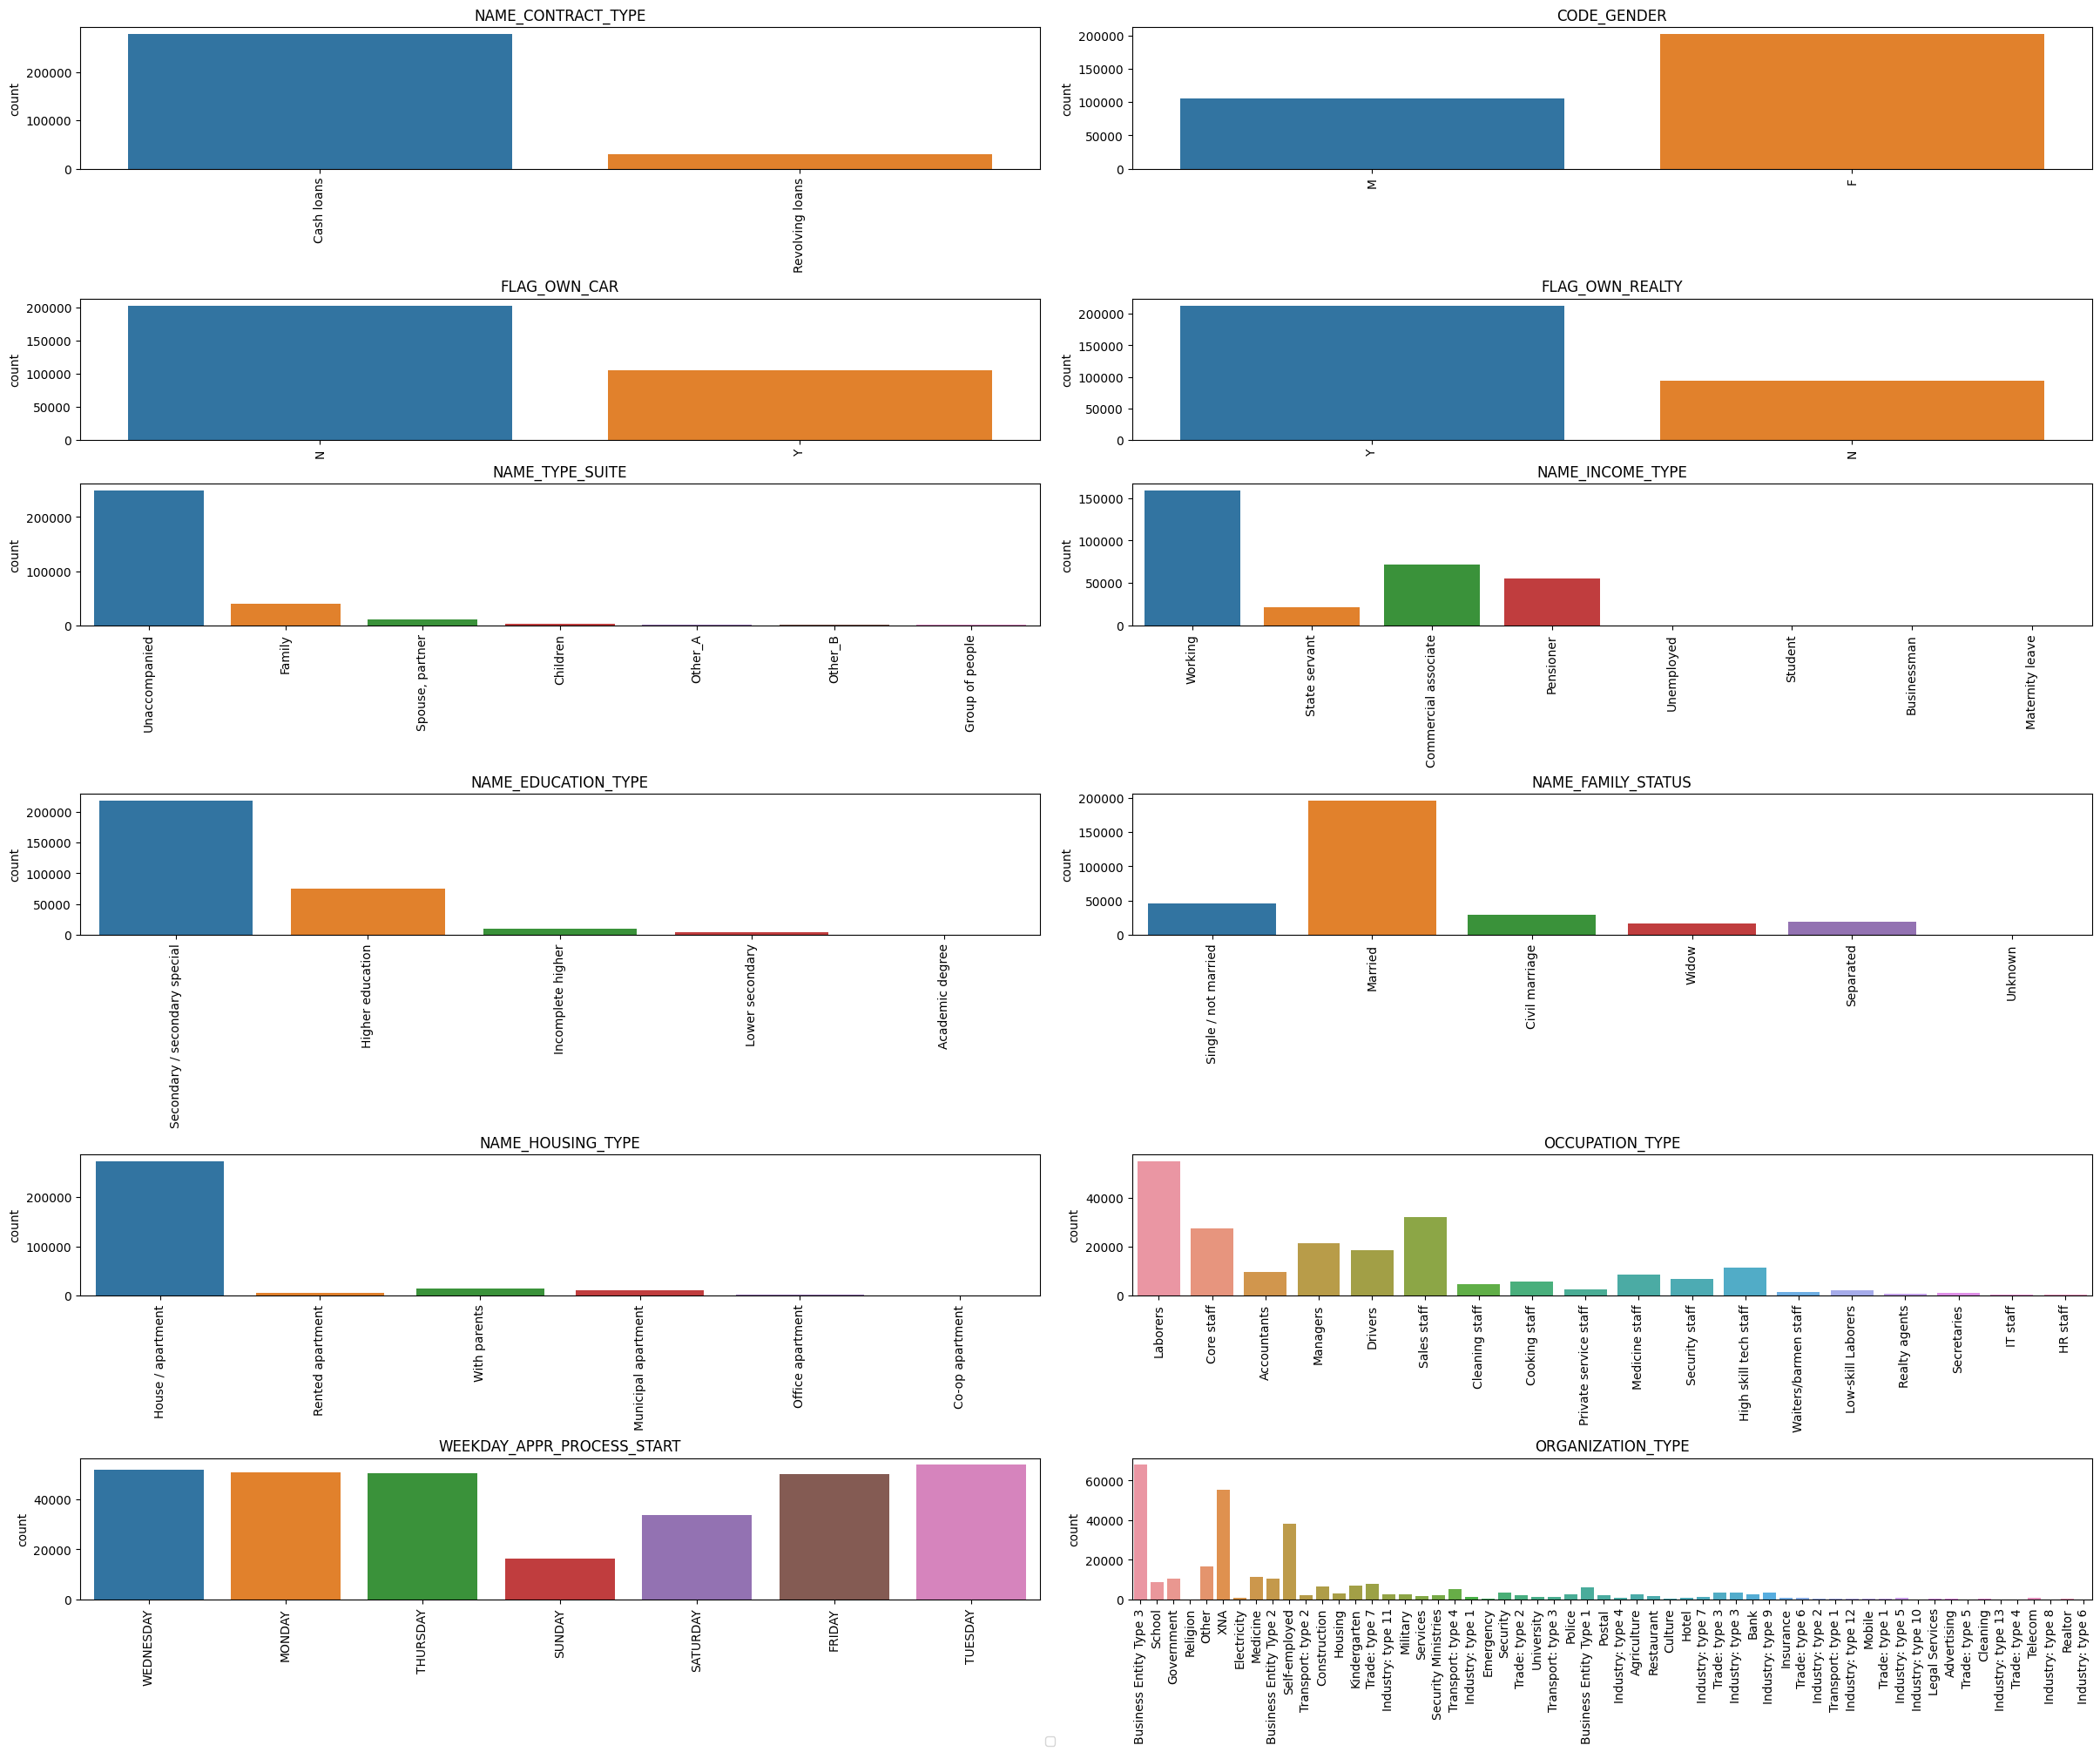

In [48]:
# grafik churn pada kolom kategorik
fig, axes = plt.subplots(6, 2, figsize=(24, 20), constrained_layout=True)

for col, ax in zip(cat_cols, axes.flat):
    sns.countplot(data = df_eda ,x=col,
                  #hue = "default_status",
                  ax=ax)
    ax.tick_params(axis='x', rotation=90)
    #ax.legend.remove()
    ax.set_xlabel('')
    ax.set_title(col)

#handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)

plt.show()

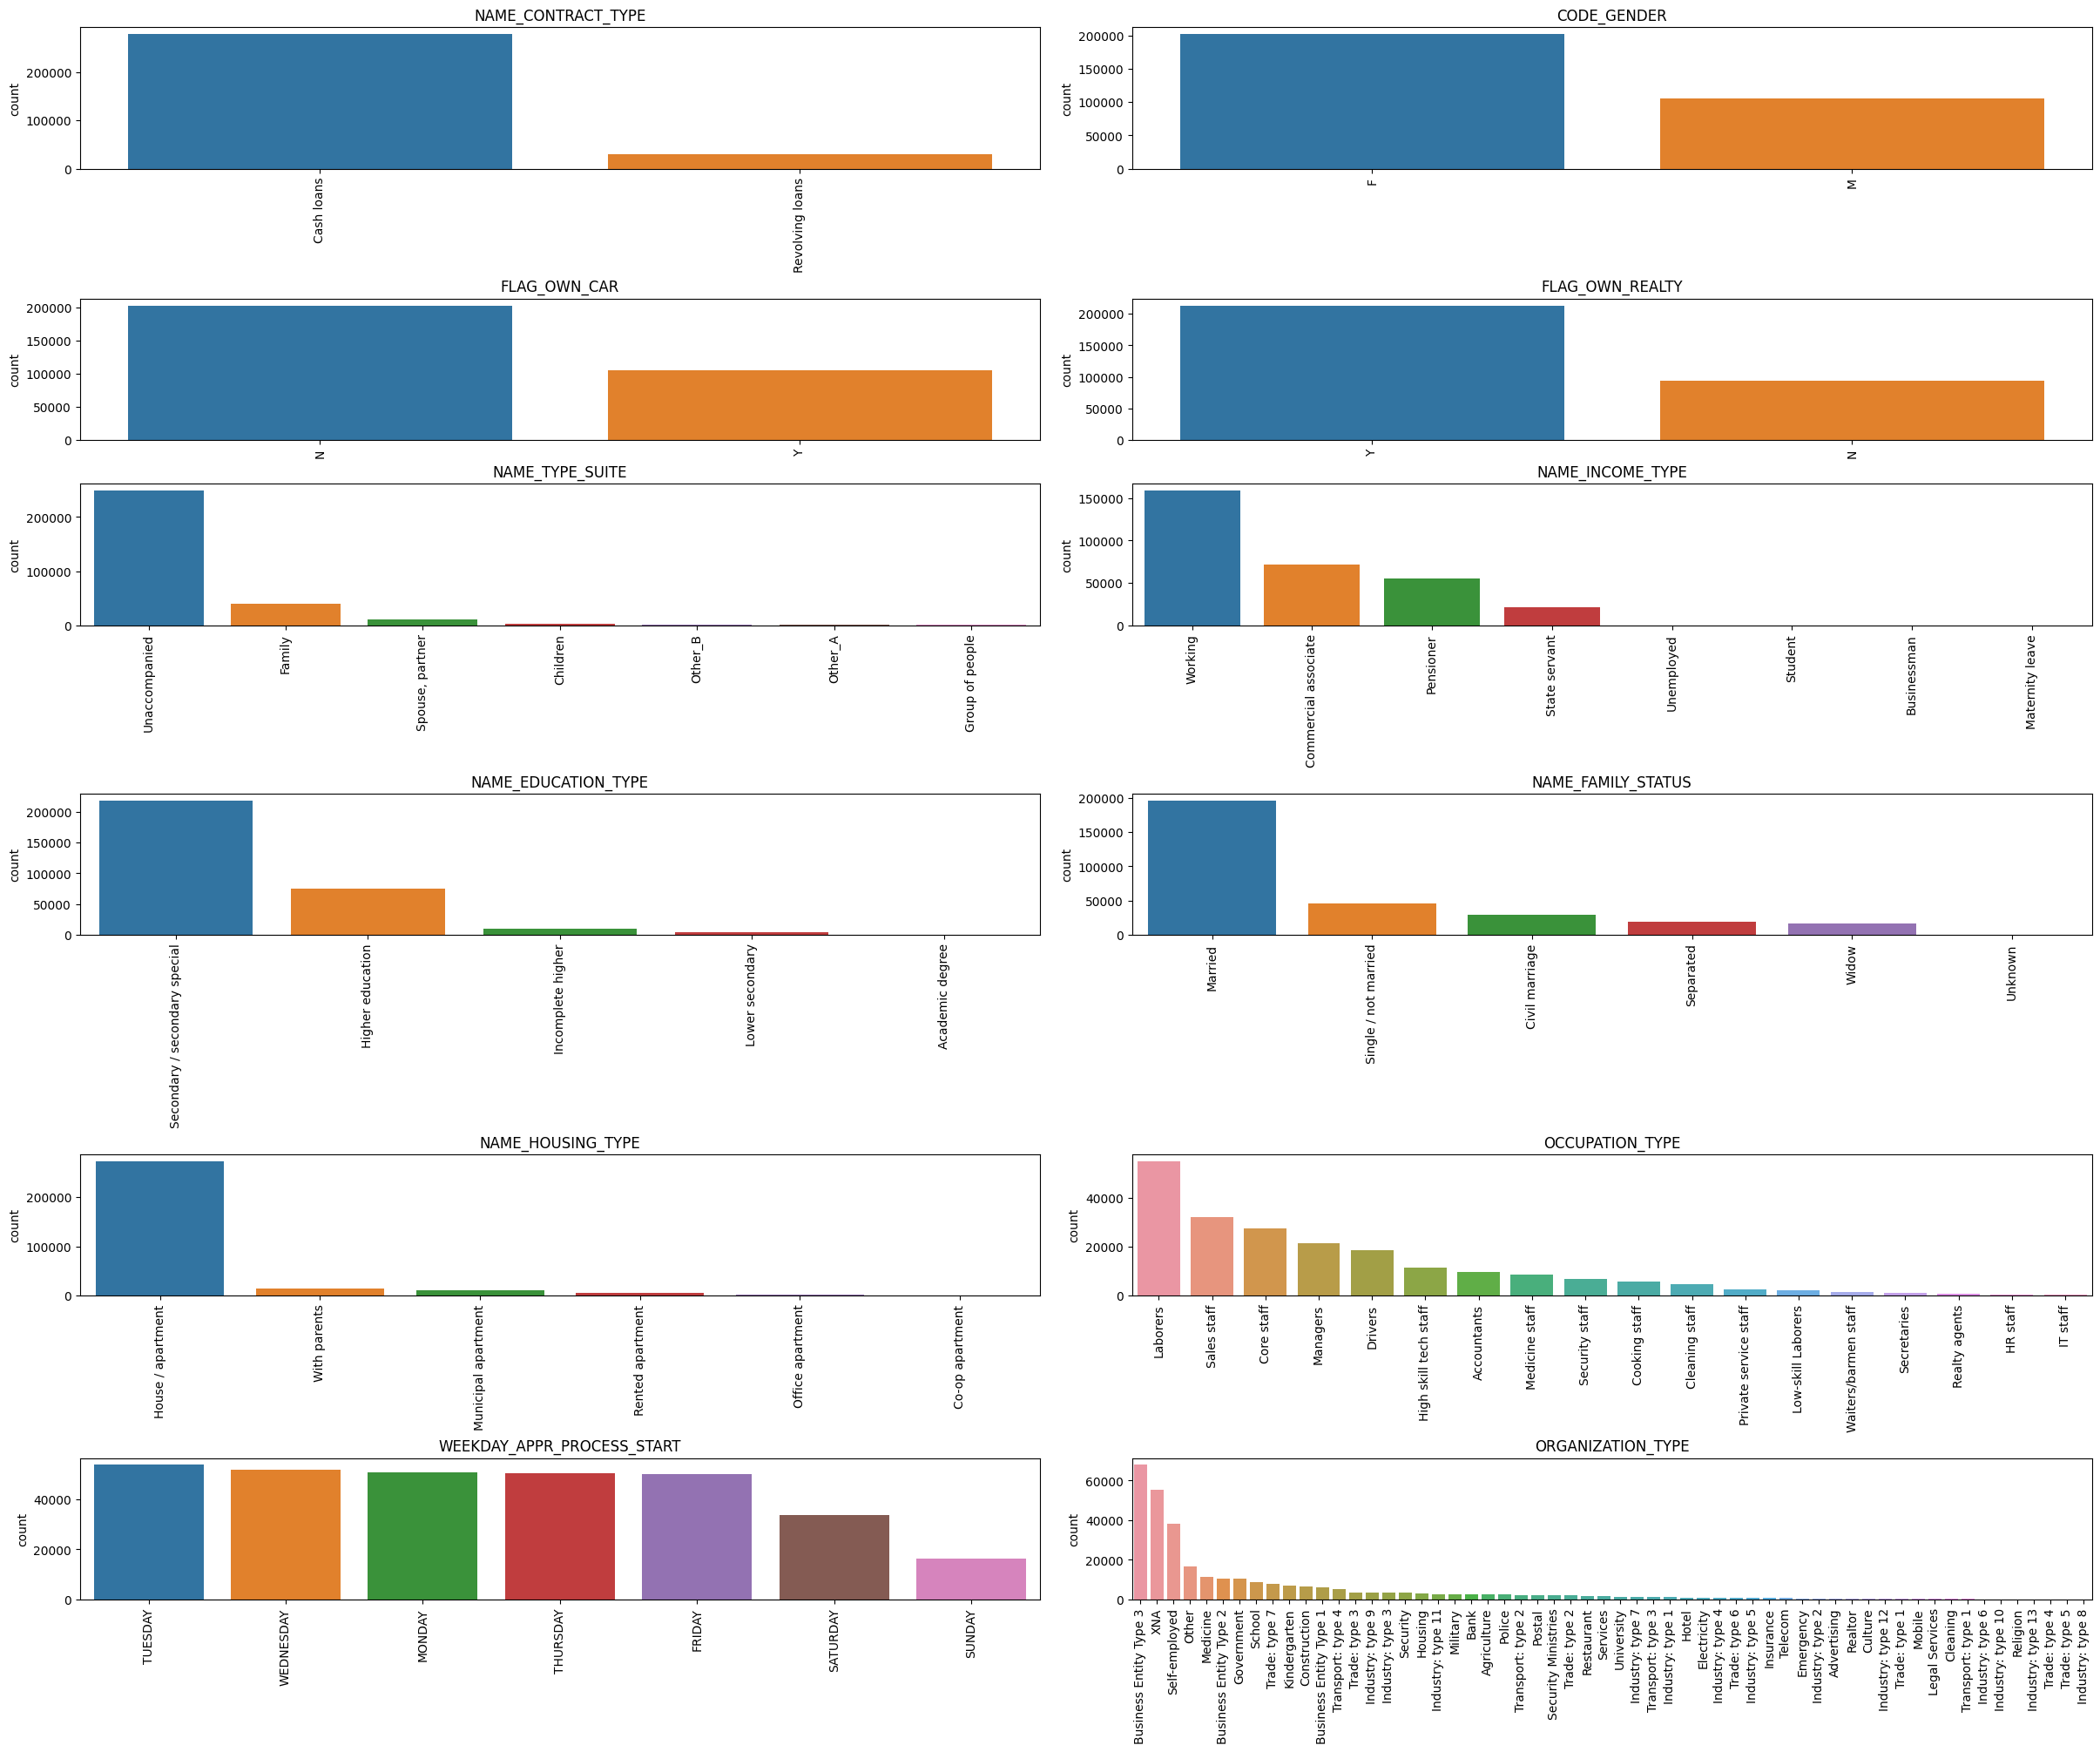

In [51]:
fig, axes = plt.subplots(6, 2, figsize=(24, 20), constrained_layout=True)

# Create a list to store the count values for each category
count_values = []

for col, ax in zip(cat_cols, axes.flat):
    # Count the occurrences of each category and store the count values
    counts = df_eda[col].value_counts()
    count_values.append(counts)

    sns.countplot(data=df_eda, x=col, order=counts.index,
                  #hue="default_status",
                  ax=ax)
    ax.tick_params(axis='x', rotation=90)
    #ax.legend_.remove()
    ax.set_xlabel('')
    ax.set_title(col)

# Concatenate all count values and sort in descending order
sorted_counts = pd.concat(count_values).groupby(level=0).sum().sort_values(ascending=False)

# Retrieve the labels based on the sorted count values
sorted_labels = [label for label in sorted_counts.index]

# Add the legend using the sorted labels
#fig.legend(sorted_labels, loc='lower center', ncol=2)

plt.show()

Jika kita asumsikan bahwa semua pengaju pinjaman diberikan pinjaman maka berdasarkan tabel data dapat kita simpulkan bahwa:
- perempuan lebih sering meminjam dibandingkan laki-laki.
- lebih banyak debitur yang memilih kotrak cash loan daripada revolving loan
- Debitur banyak yang berasal dari kelompok yang memiliki rumah/apartemen
-

Selanjutnya kita akan melihat persentase Default Risk setiap value pada setiap kolom.



In [41]:
cat_cols1=['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [76]:
# buat df cats_mean
cats_mean = pd.DataFrame(columns=['Column', 'Col_Val', 'Not Repaying Mean'])

# mencari nilai mean churn pada tiap value di kolom kategorik
for col in cat_cols1:
    unique_values = df_eda[col].unique()

    for value in unique_values:
        churn_mean = df_eda[df_eda[col] == value]['TARGET'].mean()
        new_row = pd.DataFrame({'Column': [col], 'Col_Val': [value], 'Not Repaying Mean': [churn_mean]})
        cats_mean = pd.concat([cats_mean, new_row], ignore_index=True)

cats_mean

,Column,Col_Val,Not Repaying Mean
0,NAME_CONTRACT_TYPE,Cash loans,0.083456
1,NAME_CONTRACT_TYPE,Revolving loans,0.054791
2,CODE_GENDER,M,0.101419
3,CODE_GENDER,F,0.069989
4,FLAG_OWN_CAR,N,0.084999
...,...,...,...
75,WALLSMATERIAL_MODE,Others,0.083077
76,WALLSMATERIAL_MODE,Monolithic,0.047218
77,EMERGENCYSTATE_MODE,No,0.069644
78,EMERGENCYSTATE_MODE,NaN,NaN


In [82]:
# buat df cats_mean
cats_mean = pd.DataFrame(columns=['Col_Val', 'Not Repaying Mean'])

# mencari nilai mean churn pada tiap value di kolom kategorik
for col in cat_cols1:
    unique_values = df_eda[col].unique()

    for value in unique_values:
        churn_mean = df_eda[df_eda[col] == value]['TARGET'].mean()
        combined_val = f"{col}-{value}"  # Combine Column and Col_Val
        new_row = pd.DataFrame({'Col_Val': [combined_val], 'Not Repaying Mean': [churn_mean]})
        cats_mean = pd.concat([cats_mean, new_row], ignore_index=True)

cats_mean

,Col_Val,Not Repaying Mean
0,NAME_CONTRACT_TYPE-Cash loans,0.083456
1,NAME_CONTRACT_TYPE-Revolving loans,0.054791
2,CODE_GENDER-M,0.101419
3,CODE_GENDER-F,0.069989
4,FLAG_OWN_CAR-N,0.084999
...,...,...
75,WALLSMATERIAL_MODE-Others,0.083077
76,WALLSMATERIAL_MODE-Monolithic,0.047218
77,EMERGENCYSTATE_MODE-No,0.069644
78,EMERGENCYSTATE_MODE-nan,NaN


Karena persentase nilai 1 sekitar 0.08 dari keseluruhan data maka kita akan melihat nilai "Not Repaying Mean" yang lebih besar dari 0.08

In [83]:
cat_01=cats_mean[cats_mean['Not Repaying Mean']>0.08].sort_values(by='Not Repaying Mean', ascending=False)

print(cat_01)

                                              Col_Val  Not Repaying Mean
23                   NAME_INCOME_TYPE-Maternity leave           0.400000
20                        NAME_INCOME_TYPE-Unemployed           0.363636
55                 OCCUPATION_TYPE-Low-skill Laborers           0.171606
36                 NAME_HOUSING_TYPE-Rented apartment           0.123131
37                     NAME_HOUSING_TYPE-With parents           0.116981
46                            OCCUPATION_TYPE-Drivers           0.113261
54               OCCUPATION_TYPE-Waiters/barmen staff           0.112760
27                NAME_EDUCATION_TYPE-Lower secondary           0.109277
52                     OCCUPATION_TYPE-Security staff           0.107424
41                           OCCUPATION_TYPE-Laborers           0.105771
49                      OCCUPATION_TYPE-Cooking staff           0.104440
2                                       CODE_GENDER-M           0.101419
68                    HOUSETYPE_MODE-specific housi

Dari tabel terlihat bahwa walaupun laki-laki jarang meminjam akan tetapi mereka lebih besar persentase tidak mampu membayar.

Dari tabel juga kita bisa memikirkan ulang untuk memberikan pinjaman ke kelompok yang memililki nilai mean di atas 0.08

In [97]:
list_cat_01 = cat_01['Col_Val'].sort_values(ascending=False).tolist()
list_cat_01

['WALLSMATERIAL_MODE-Wooden',
 'WALLSMATERIAL_MODE-Others',
 'OCCUPATION_TYPE-Waiters/barmen staff',
 'OCCUPATION_TYPE-Security staff',
 'OCCUPATION_TYPE-Sales staff',
 'OCCUPATION_TYPE-Low-skill Laborers',
 'OCCUPATION_TYPE-Laborers',
 'OCCUPATION_TYPE-Drivers',
 'OCCUPATION_TYPE-Cooking staff',
 'OCCUPATION_TYPE-Cleaning staff',
 'NAME_TYPE_SUITE-Unaccompanied',
 'NAME_TYPE_SUITE-Other_B',
 'NAME_TYPE_SUITE-Other_A',
 'NAME_TYPE_SUITE-Group of people',
 'NAME_INCOME_TYPE-Working',
 'NAME_INCOME_TYPE-Unemployed',
 'NAME_INCOME_TYPE-Maternity leave',
 'NAME_HOUSING_TYPE-With parents',
 'NAME_HOUSING_TYPE-Rented apartment',
 'NAME_HOUSING_TYPE-Municipal apartment',
 'NAME_FAMILY_STATUS-Single / not married',
 'NAME_FAMILY_STATUS-Separated',
 'NAME_FAMILY_STATUS-Civil marriage',
 'NAME_EDUCATION_TYPE-Secondary / secondary special',
 'NAME_EDUCATION_TYPE-Lower secondary',
 'NAME_EDUCATION_TYPE-Incomplete higher',
 'NAME_CONTRACT_TYPE-Cash loans',
 'HOUSETYPE_MODE-terraced house',
 'HOUSET

## Kolom Numerik

In [ ]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [ ]:
data = {
    'fitur': df_eda[num_cols].columns,
    'nuniq': df_eda[num_cols].nunique(),
    'uniq': df_eda[num_cols].apply(lambda x: x.unique())
}
eda_num_uniq = pd.DataFrame(data)

eda_num_uniq

,fitur,nuniq,uniq
SK_ID_CURR,SK_ID_CURR,307506,"[100002, 100003, 100004, 100006, 100007, 10000..."
TARGET,TARGET,2,"[1, 0]"
CNT_CHILDREN,CNT_CHILDREN,15,"[0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19,..."
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,2547,"[202500.0, 270000.0, 67500.0, 135000.0, 121500..."
AMT_CREDIT,AMT_CREDIT,5603,"[406597.5, 1293502.5, 135000.0, 312682.5, 5130..."
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,9,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,9,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,24,"[0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,11,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ..."


In [84]:
num_cat=eda_num_uniq['fitur'][eda_num_uniq["nuniq"]<4].tolist()

In [85]:
num_cat

['TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

#### Melihat Data berdasarkan Daerah Tempat Tinggal

In [87]:
region = [item for item in num_cat if 'REGION' in item]
region

['REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION']

In [92]:
# buat df cats_mean
cats_mean = pd.DataFrame(columns=['Col_Val', 'Not Repaying Mean'])

# mencari nilai mean churn pada tiap value di kolom kategorik
for col in region:
    unique_values = df_eda[col].unique()

    for value in unique_values:
        churn_mean = df_eda[df_eda[col] == value]['TARGET'].mean()
        combined_val = f"{col}-{value}"  # Combine Column and Col_Val
        new_row = pd.DataFrame({'Col_Val': [combined_val], 'Not Repaying Mean': [churn_mean]})
        cats_mean = pd.concat([cats_mean, new_row], ignore_index=True)

cats_mean.sort_values(by='Not Repaying Mean', ascending=False)

,Col_Val,Not Repaying Mean
5,REGION_RATING_CLIENT_W_CITY-3,0.114024
2,REGION_RATING_CLIENT-3,0.111031
7,REG_REGION_NOT_LIVE_REGION-1,0.092978
9,REG_REGION_NOT_WORK_REGION-1,0.088906
11,LIVE_REGION_NOT_WORK_REGION-1,0.084460
10,LIVE_REGION_NOT_WORK_REGION-0,0.080569
6,REG_REGION_NOT_LIVE_REGION-0,0.080538
8,REG_REGION_NOT_WORK_REGION-0,0.080289
3,REGION_RATING_CLIENT_W_CITY-2,0.079175
0,REGION_RATING_CLIENT-2,0.078888


Dari tabel terlihat untuk meminimalisir debitur yang tidak mampu membayar kita dapat mempertimbangkan untuk tidak memberi pinjaman ke kelompok pada kolom  REGION_RATING_CLIENT_W_CITY atau REGION_RATING_CLIENT yang bernilai 3.

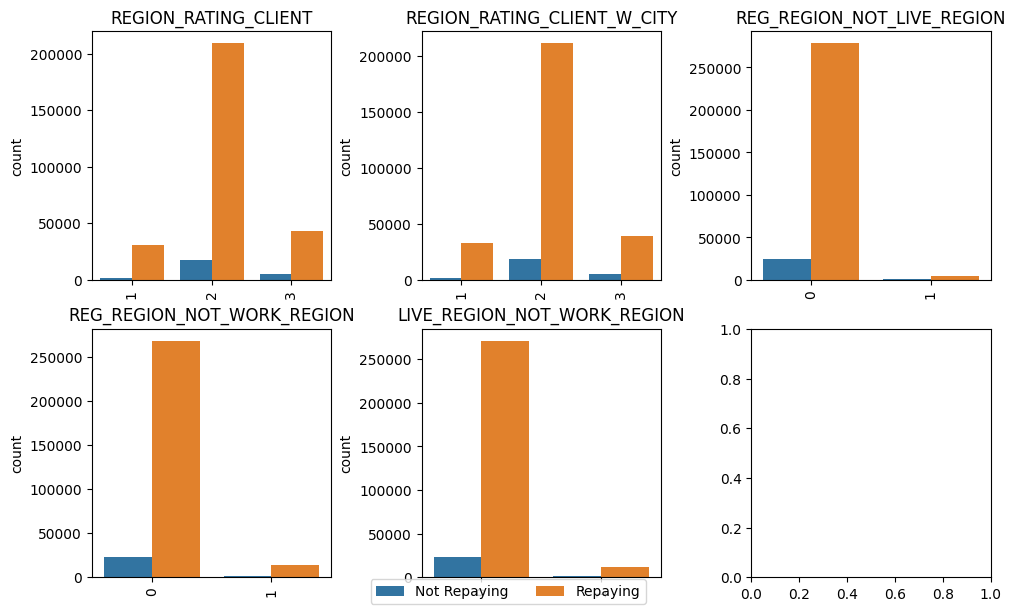

In [91]:
# grafik churn pada kolom kategorik
fig, axes = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)

for col, ax in zip(region, axes.flat):
    sns.countplot(data = df_eda ,x=col , hue = 'default_status', ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.legend_.remove()
    ax.set_xlabel('')
    ax.set_title(col)

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)

plt.show()

In [ ]:
num_cont=[col for col in num_cols if col not in num_cat]

In [ ]:
num_cont

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MED

In [72]:
num_cont_new = [item for item in num_cont if ('_MEDI' not in item) and ('_MOD' not in item) and ('_AVG' not in item)]
num_cont_new

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

#### Melihat Data berdasarkan Tempat Tinggal

In [69]:
avg = [item for item in num_cont if '_AVG' in item]
avg

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG']

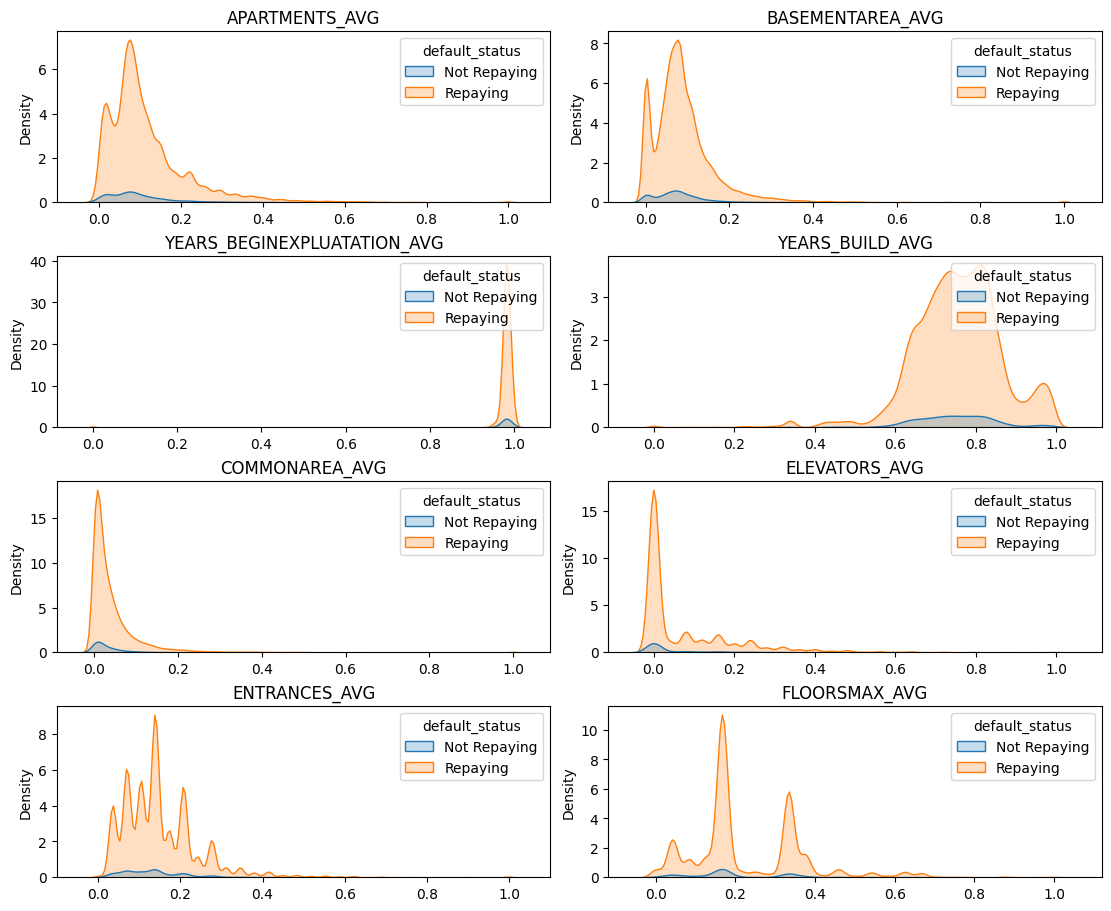

In [67]:
#grafik kolom numerik
fig, axes = plt.subplots(4, 2, figsize=(11, 9), constrained_layout=True)

for col, ax in zip(avg, axes.flat):
    sns.kdeplot(data = df_eda ,x=col , hue = 'default_status', ax=ax, fill=True)

    ax.set_xlabel('')
    ax.set_title(col)

In [70]:
med = [item for item in num_cont if '_MEDI' in item]
med

['APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI']

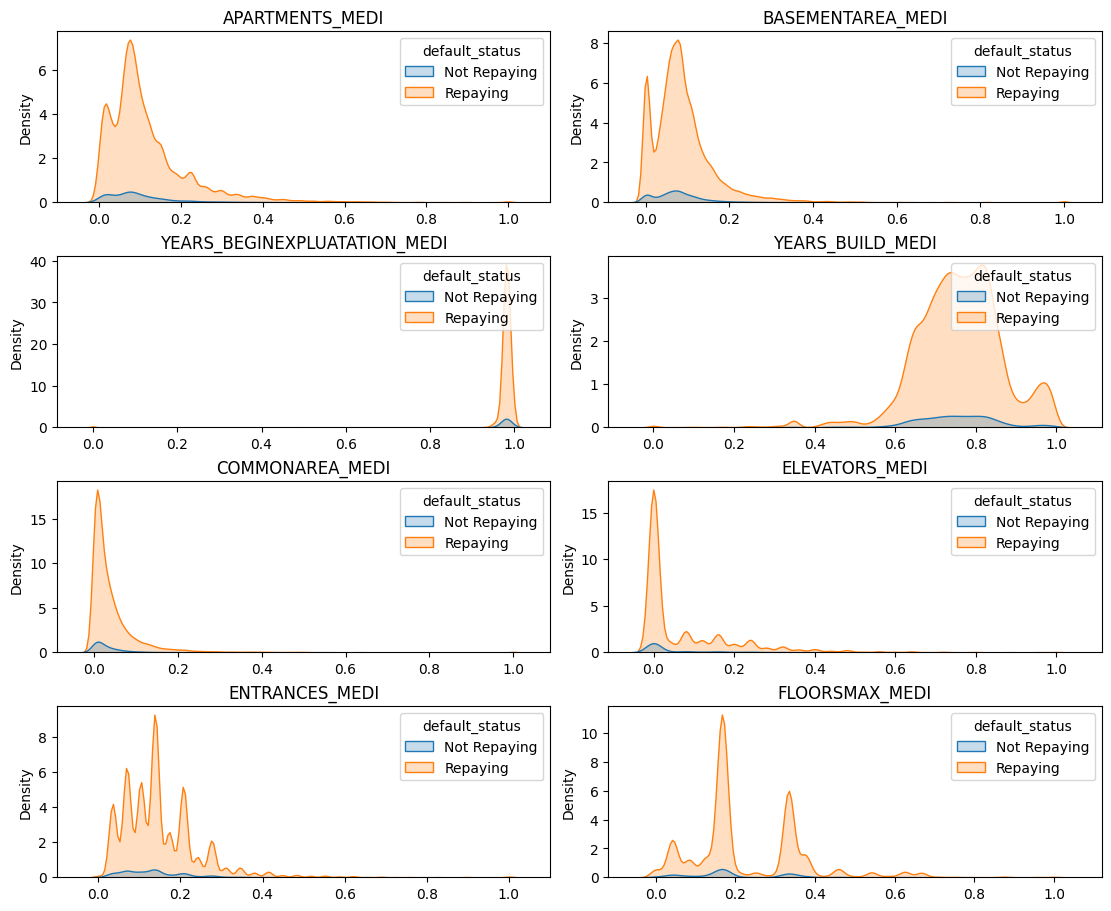

In [71]:
#grafik kolom numerik
fig, axes = plt.subplots(4, 2, figsize=(11, 9), constrained_layout=True)

for col, ax in zip(med, axes.flat):
    sns.kdeplot(data = df_eda ,x=col , hue = 'default_status', ax=ax, fill=True)

    ax.set_xlabel('')
    ax.set_title(col)

In [73]:
mod = [item for item in num_cont if '_MOD' in item]
mod

['APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'TOTALAREA_MODE']

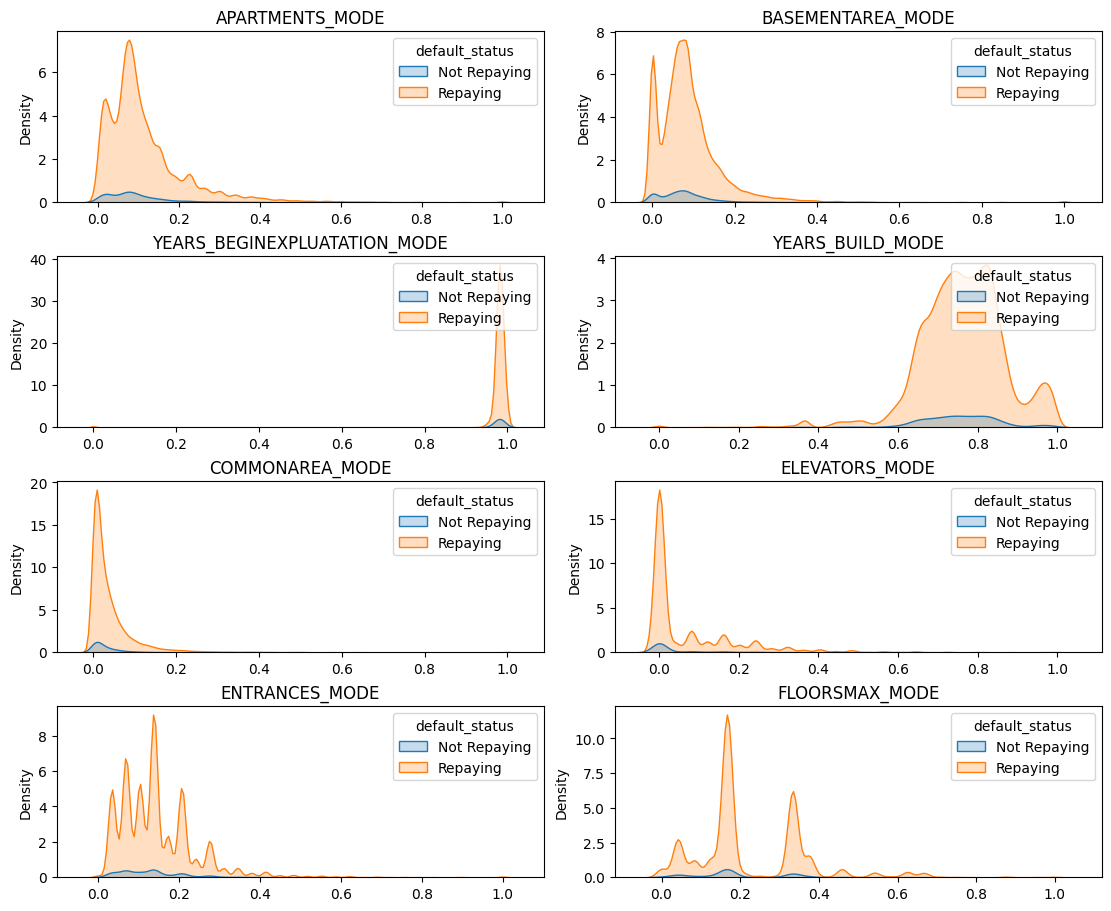

In [74]:
#grafik kolom numerik
fig, axes = plt.subplots(4, 2, figsize=(11, 9), constrained_layout=True)

for col, ax in zip(mod, axes.flat):
    sns.kdeplot(data = df_eda ,x=col , hue = 'default_status', ax=ax, fill=True)

    ax.set_xlabel('')
    ax.set_title(col)

Berdasarkan tempat tinggal terlihat tidak ada pola khusus yang menunjukan debitur akan membayar atau tidak.

# KESIMPULAN
- Data yang kita olah memiliki kelas 1 (Not Repaying) sebesar 8% dari data keseluruhan
- Karena data pada kelas 1 adalah 8% maka kita bisa mempertimbangkan untuk memmbarikan pinjaman kepada kelompok yang memiliki nilai mean Target pada kolom numerik kategorik atau kategorik sebesar > 8%
- Berdasarkan nilai mean TARGET pada kolom kategorik terlihat bahwa kita bisa mempertimbangkan kembali pinjaman ke debitur pada kelompok:

['WALLSMATERIAL_MODE-Wooden',
 'WALLSMATERIAL_MODE-Others',
 'OCCUPATION_TYPE-Waiters/barmen staff',
 'OCCUPATION_TYPE-Security staff',
 'OCCUPATION_TYPE-Sales staff',
 'OCCUPATION_TYPE-Low-skill Laborers',
 'OCCUPATION_TYPE-Laborers',
 'OCCUPATION_TYPE-Drivers',
 'OCCUPATION_TYPE-Cooking staff',
 'OCCUPATION_TYPE-Cleaning staff',
 'NAME_TYPE_SUITE-Unaccompanied',
 'NAME_TYPE_SUITE-Other_B',
 'NAME_TYPE_SUITE-Other_A',
 'NAME_TYPE_SUITE-Group of people',
 'NAME_INCOME_TYPE-Working',
 'NAME_INCOME_TYPE-Unemployed',
 'NAME_INCOME_TYPE-Maternity leave',
 'NAME_HOUSING_TYPE-With parents',
 'NAME_HOUSING_TYPE-Rented apartment',
 'NAME_HOUSING_TYPE-Municipal apartment',
 'NAME_FAMILY_STATUS-Single / not married',
 'NAME_FAMILY_STATUS-Separated',
 'NAME_FAMILY_STATUS-Civil marriage',
 'NAME_EDUCATION_TYPE-Secondary / secondary special',
 'NAME_EDUCATION_TYPE-Lower secondary',
 'NAME_EDUCATION_TYPE-Incomplete higher',
 'NAME_CONTRACT_TYPE-Cash loans',
 'HOUSETYPE_MODE-terraced house',
 'HOUSETYPE_MODE-specific housing',
 'FLAG_OWN_REALTY-N',
 'FLAG_OWN_CAR-N',
 'EMERGENCYSTATE_MODE-Yes',
 'CODE_GENDER-M']

- Berdasarkan Wilayah tempat tinggal kita bisa mempertimbangkan kembali untuk kode wilayah berkode 3. 

